# EasyVisa Project



## Importing necessary libraries and data

In [1]:
# this will help in making our Python code more structured automatically (good coding practice)

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

### Lets read our dataset

In [2]:
visa_data = pd.read_csv("/content/EasyVisa.csv")


In [3]:
# copying data to another variable to avoid any changes to original data
data = visa_data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Overview of the Dataset

### Lets view the first and last 10 rows of the dataset

In [22]:
visa_data.sample(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
20132,Asia,Bachelor's,Y,N,1698,2003,South,58192.9100,Year,Y,Certified
9672,Asia,Bachelor's,Y,N,1617,1951,Northeast,139105.1100,Year,Y,Denied
16947,Europe,High School,Y,N,73987,2010,South,109326.2100,Year,Y,Certified
6789,Europe,Bachelor's,N,N,1142,2013,Midwest,63677.3800,Year,Y,Certified
3974,Europe,Master's,N,N,3124,2008,Midwest,80040.1700,Year,Y,Certified
13238,Asia,Bachelor's,N,N,2009,1996,West,344.3705,Hour,Y,Denied
18692,Asia,Bachelor's,N,N,859,2001,West,123631.1400,Year,Y,Denied
23016,Asia,Bachelor's,Y,N,256,2001,South,47078.9100,Year,Y,Denied
18346,North America,Master's,N,N,333,1909,Midwest,60810.7000,Year,Y,Certified
22051,Asia,Doctorate,Y,N,1977,2012,Northeast,117978.6600,Year,Y,Certified


In [21]:
visa_data.tail(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25470,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25471,Asia,High School,N,N,40224,1962,Island,75587.4200,Year,Y,Certified
25472,Asia,High School,N,N,1346,2003,Midwest,76155.6000,Year,N,Certified
25473,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25474,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
25479,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified


### Understand the shape of the dataset

In [23]:
visa_data.shape

(25480, 11)

Observation
*   we have 25480 rows and 12 columns



### Lets check the data types of the columns of the dataset

In [24]:
visa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


Observation
*   there are 9 object, 2 intergers and 1 float datatypes present in the dataset



### Lets check for duplicate values

In [8]:
visa_data.duplicated().sum()

np.int64(0)

*   There is no duplicate in our dataset



#### Statistical summary of the dataset

In [13]:
visa_data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Observation
*   The average wage paid to similarly employed workers in a specific occupation in the area of intended employment is 74455 dollars per annum



#### Lets Fix the negative values in number of employees columns

In [14]:
visa_data["no_of_employees"]=visa_data["no_of_employees"].abs()

In [15]:
visa_data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Let's check the count of each unique category in each of the categorical variables in the dataset

In [17]:
# Making a list of all catrgorical variables
cat_col = list(visa_data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [18]:
# lets check the number of unique values in the dataset

visa_data["case_id"].unique()

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

### Univariate Analysis

In [27]:
def histogram_boxplot(data, feature, figsize=(16, 12), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on the number of employees

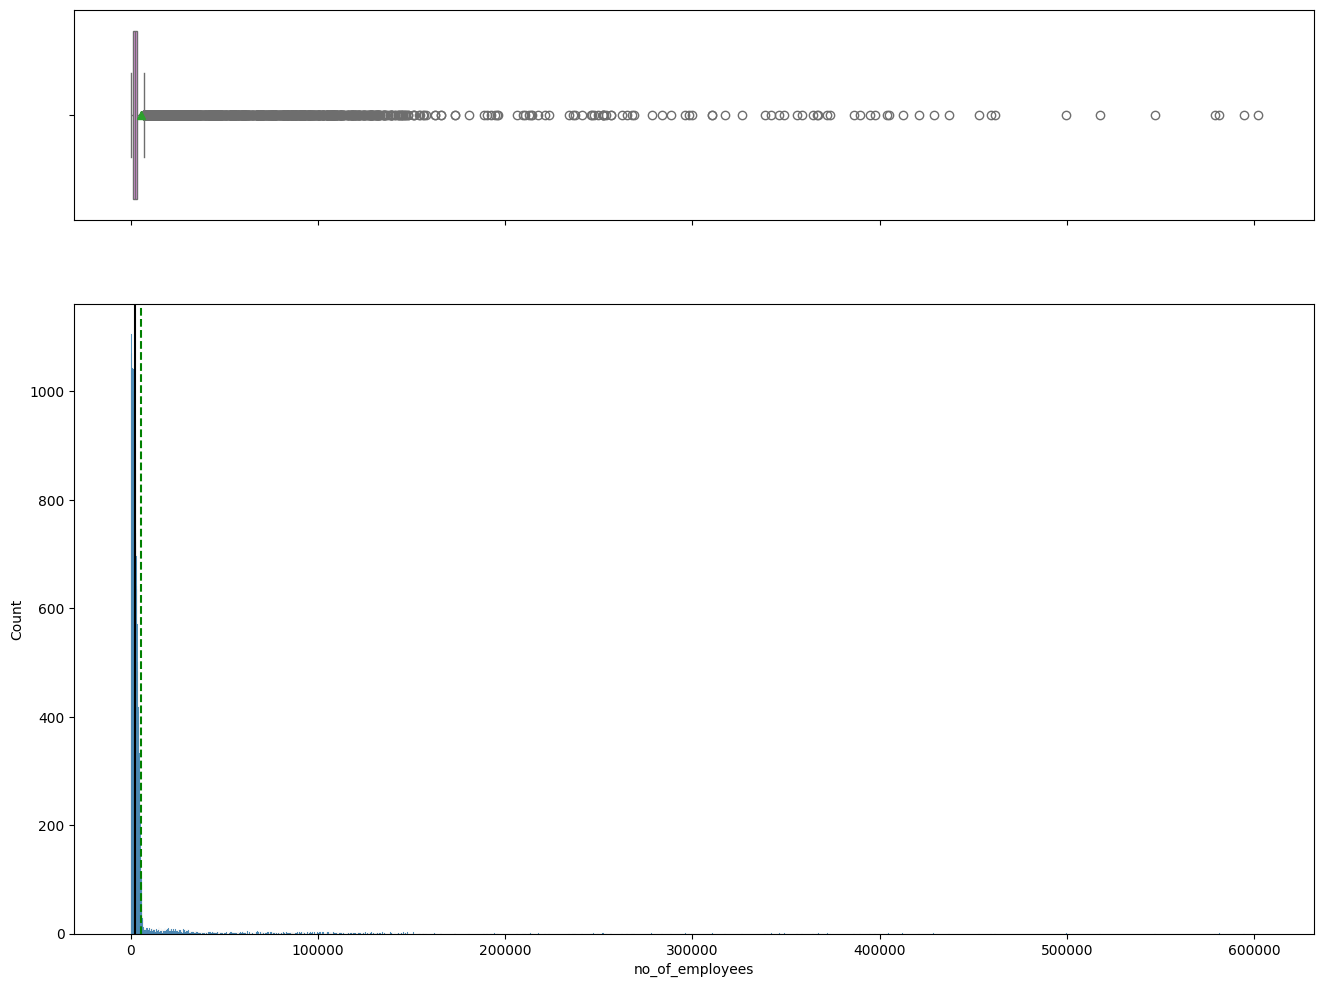

In [28]:
histogram_boxplot(visa_data, "no_of_employees")

Observation
*   There are several outliers present in this column, which means there are more than 600000 potential employees who have applied for the visa




#### Observations on prevailing wage

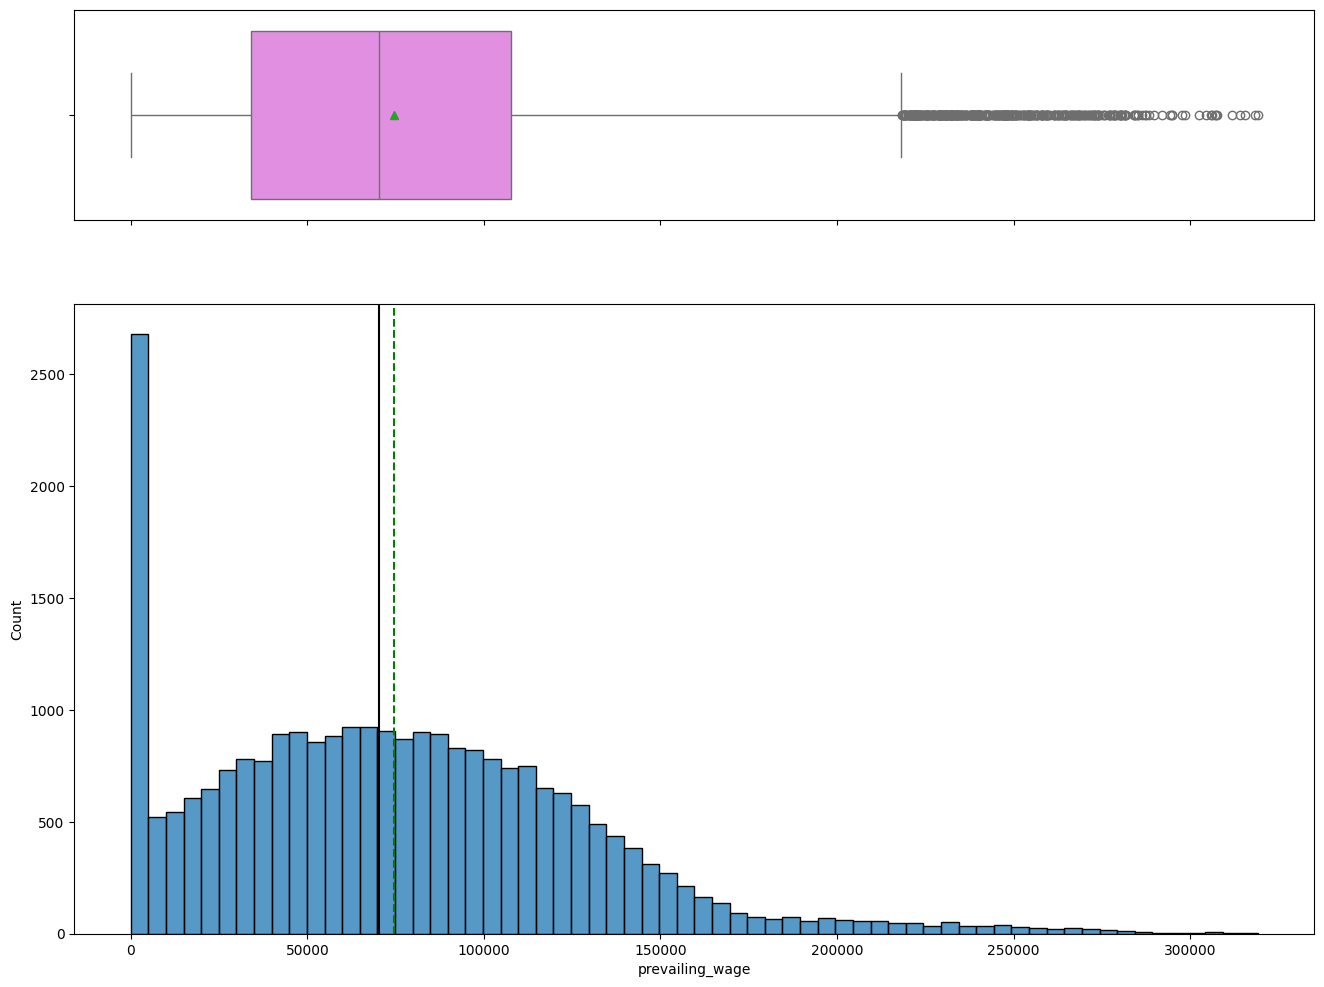

In [29]:
histogram_boxplot(visa_data, "prevailing_wage")

Observation

*   Some employees earn above 300,000 dollar per annum
*   Majority of the employees earn below $50,0000 per annum
*   The boxplot shows that there are outliers at the upper whisker
*   We will not treat these outliers as they represent the real data in the dataset





### Lets check for observations which have less than 100 prevailing wage

In [30]:
visa_data.loc[visa_data["prevailing_wage"] < 100, "unit_of_wage"]

,unit_of_wage
338,Hour
634,Hour
839,Hour
876,Hour
995,Hour
...,...
25023,Hour
25258,Hour
25308,Hour
25329,Hour


In [31]:
# function to create labeled barplots


def labeled_barplot(visa_data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

#### Observations on continent

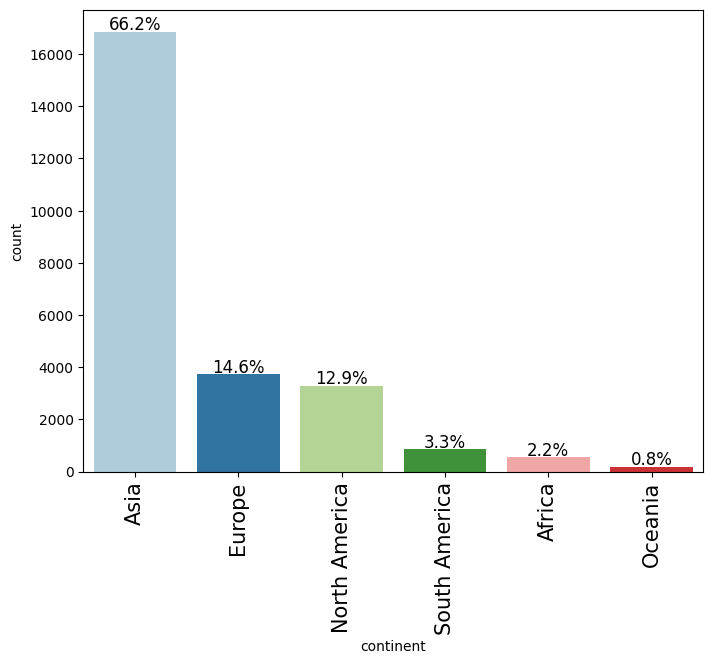

In [32]:
labeled_barplot(visa_data, "continent", perc=True)

Observation

*   66.2 percent of the applicants are from the Asian Continent
*   The lowest number of applicants came from Africa and Oceania



#### Observations on education of employee

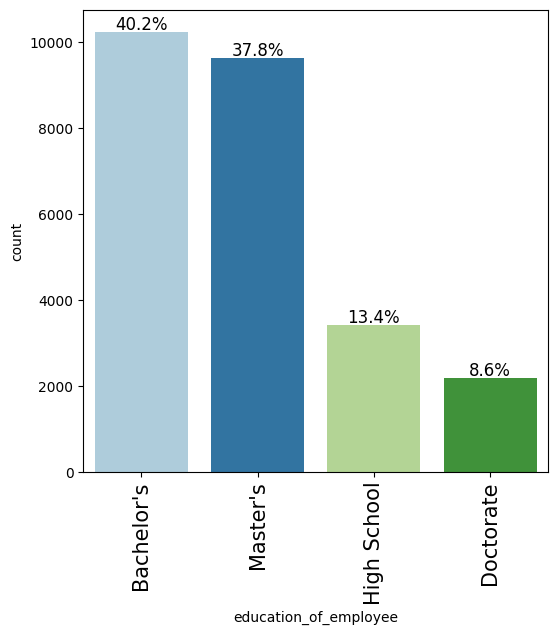

In [33]:
labeled_barplot(visa_data, "education_of_employee", perc=True)

Observation

*  40.2 percent of the employees are Bachelor's degree holders
*  37.8 percent of the employees are Master's degree holders
*  13.4 percent of the employees are High School Certificate holders
*  8.6 percent of the employees are Doctorate degree holders




 #### Observations on job experience

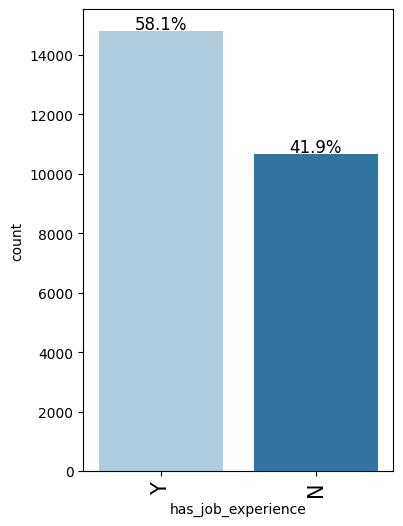

In [34]:
labeled_barplot(visa_data, "has_job_experience", perc=True)

Observation

*   58.1 percent of the employees have previous work experience. This represents a total of 987,675 employees
*   41.9 percent of the employees have no previous work experience. This represents a total number of 712,282 applicants



#### Observations on region of employment

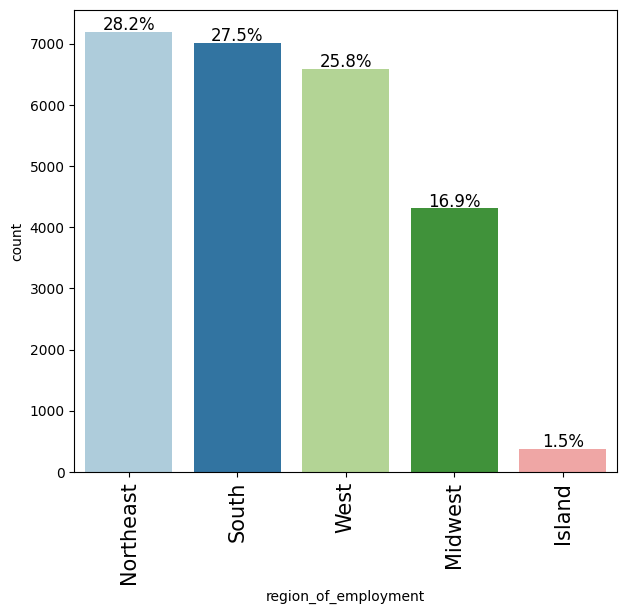

In [35]:
labeled_barplot(visa_data, "region_of_employment", perc=True)

Observation

*   A good majority of the applicants intends to work in the Northeast,Southern and Western region of the United States
*   Only 1.5 percent is interested in working in the Island region of the United States



#### Observations on unit of wage

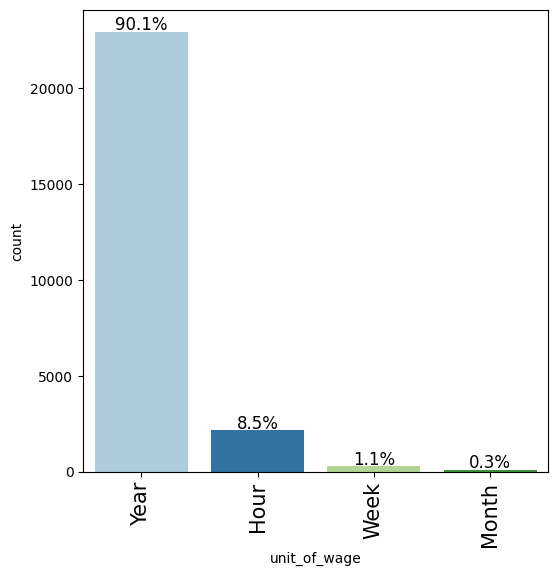

In [36]:
labeled_barplot(visa_data, "unit_of_wage", perc=True)

Observation

*   90.10 percent of the employees prefer yearly wage
*   Only 0.3 percent of the employees prefer monthly wage



#### Observations on case status

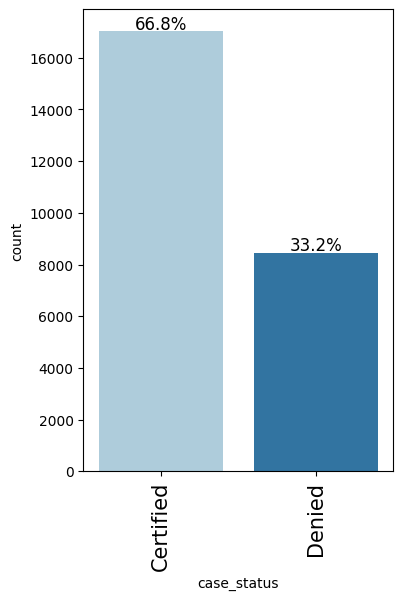

In [37]:
labeled_barplot(visa_data, "case_status", perc=True)

Observation

*   Approximately 1,135,571 employees which represent about 66.8 percent of the total number of employees have their visas certified
*   Aprroximately 564,386 employees which represent about 33.2 percent of the total number of employees had their visas denied



## Bivariate Analysis

### Lets check for correlation between the variables

<Axes: >

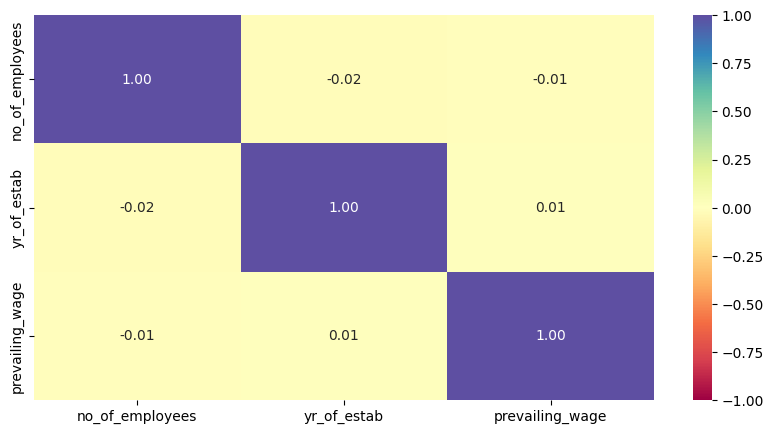

In [39]:
cols_list = visa_data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 5))
sns.heatmap(visa_data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

Observation

*   There is no correlation between the variables



### Lets Create functions that will help us with further analysis

In [40]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(visa_data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",

    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [41]:
def stacked_barplot(visa_data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


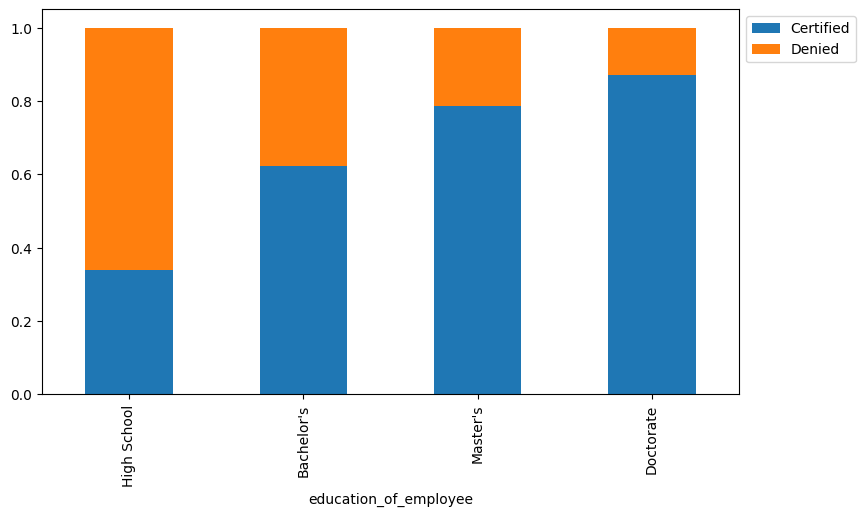

In [42]:
stacked_barplot(visa_data, "education_of_employee", "case_status")

Obersvation

*   62 percent of employees with Bachelor's degree got their visas certified while 38 percent of employees with same degree were rejected
*   Only 34 percent of employees with High School Certificates had their visas certified. The remaining 66 percent of employees with High School Certificate were denied visa
*   79 percent of employees with Master's degree had their visas certified while remaining 21 percent with same degree were denied
*   87 percent of employees with Doctorate degrees had visas approved as compared to other employees with lower degree. This clearly shows that education played a major role in visa approval or denial
*   The stacked barplot above shows that a high percentage of employees with higher degree got visas certified as compared to employees with lower certificate







### Let's have a look at how visa status vary across different continents

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


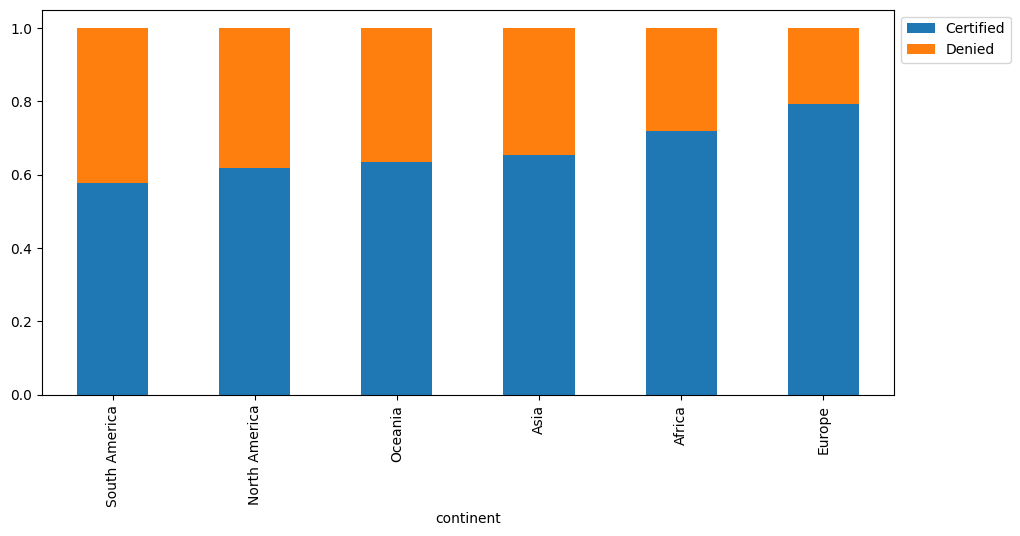

In [43]:
stacked_barplot(visa_data, "continent", "case_status")

Observation

*   Majority of the employees who got their visas certified are from Europe,followed by employees from Africa, Asia, Oceania, North America and South America
*   The highest percentage of visa denial of the employees by continent came from South America.



### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


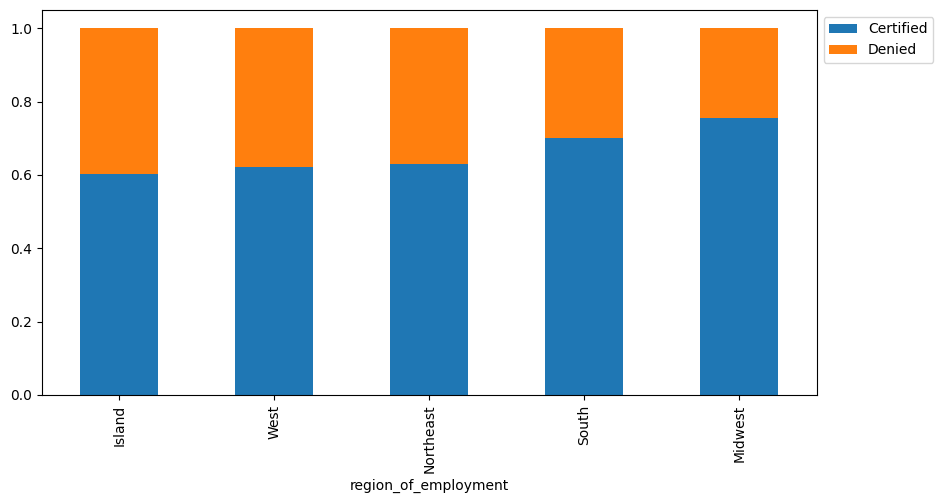

In [44]:
stacked_barplot(visa_data, "region_of_employment", "case_status")

Observation

*   76 percent of applicants who applied to work in the Midwest region had their visas Certified
*   40 percent of applicants who applied to work in the Island region region had their visas denied. This represents the region with the highest visa denial
*   The Western and Northern region has very close number of applicants whose visas were either certified or denied
*   70 percent of applicants who applied to work in the Southern region had their visas Certified
*   The Southern and Midwest region has the highest number of employees whose visas were certified








### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

has_job_experience        N      Y    All
region_of_employment                     
All                   10678  14802  25480
Northeast              2934   4261   7195
South                  2920   4097   7017
West                   2705   3881   6586
Midwest                1964   2343   4307
Island                  155    220    375
------------------------------------------------------------------------------------------------------------------------


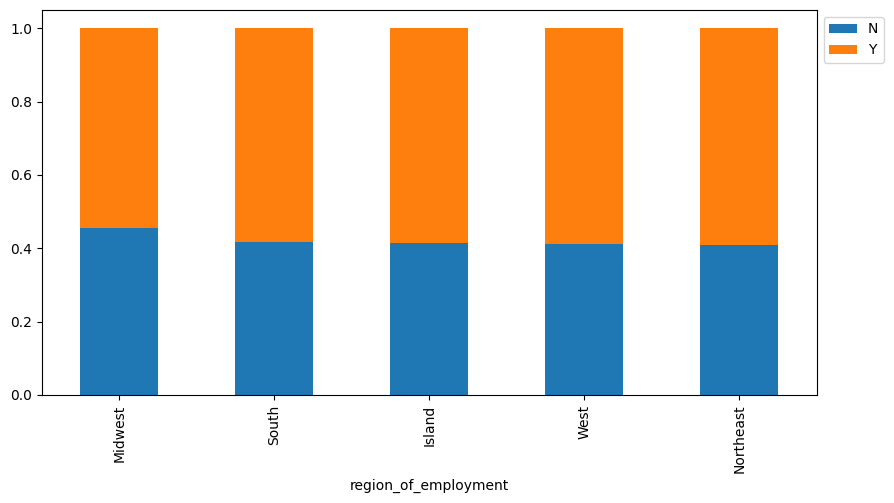

In [45]:
stacked_barplot(visa_data, "region_of_employment", "has_job_experience")

Observation

*   The highest of number of employees with work experience can be found in the Northeast region. This represents about 59 percent of the totoal number of employees in the Northeast region. However, only about 63 percent of the employees got their visa certified. This is quite low as compared to regions like South and Midwest region. So, job experience did not play any major role in visa certification



### Lets see if employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


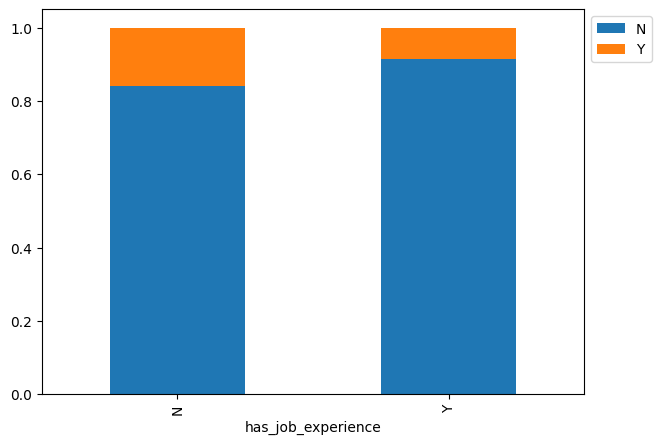

In [46]:
stacked_barplot(visa_data, "has_job_experience", "requires_job_training")

Observation

*   Employees with previous work experience do not require additional job trainig



#### <b>The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage.</b>

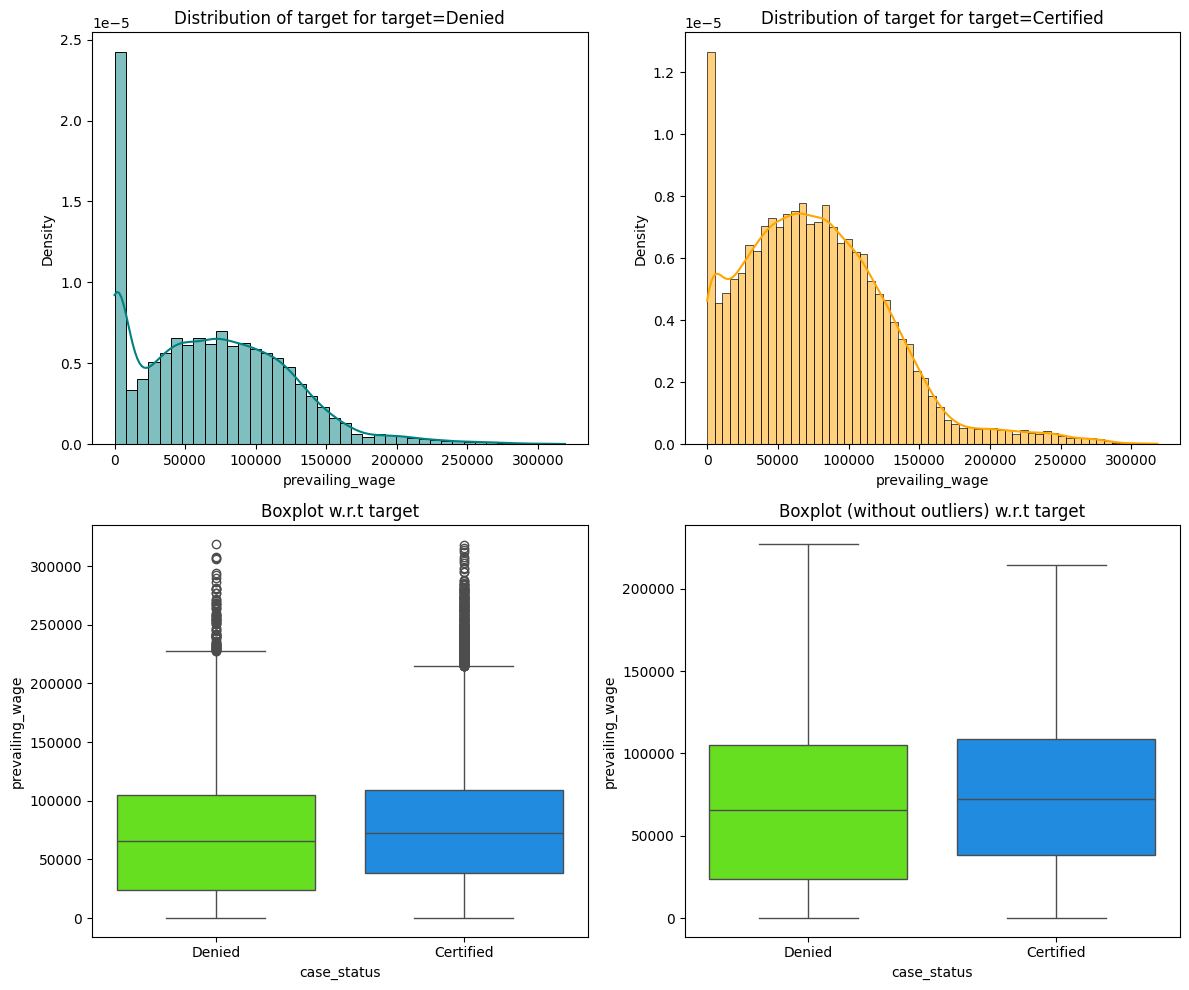

In [47]:
distribution_plot_wrt_target(visa_data, "prevailing_wage", "case_status")

In [48]:
visa_prevailing_wage = visa_data.groupby(['prevailing_wage'])['case_status'].count()
visa_prevailing_wage

,case_status
prevailing_wage,
2.1367,1
2.9561,1
3.0031,1
3.3188,1
3.4889,1
...,...
311734.4900,1
314156.0600,1
315497.6000,1


Observation

*   There is a presence outliers at the uppper whisker of the boxplot. This indicates that some candidates with certified visas earn extreme amounts beyond the prevailing minimum wage



#### Lets check if the prevailing wage is similar across all the regions of the US

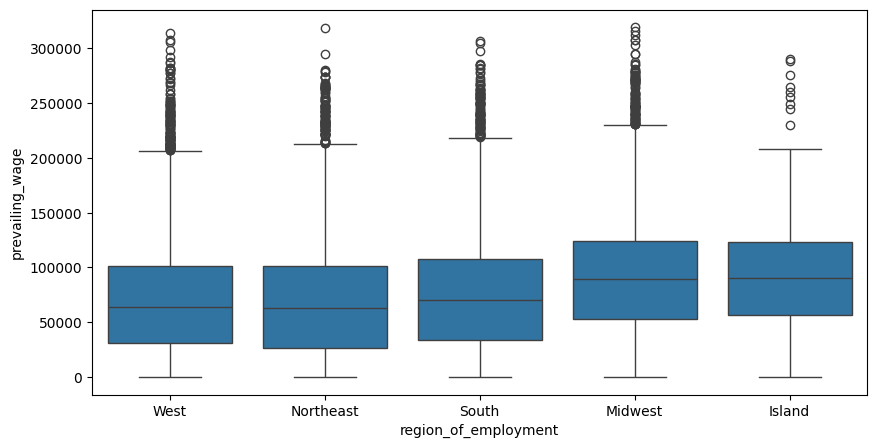

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=visa_data, x='region_of_employment' , y ='prevailing_wage')
plt.show()

In [50]:
prevailing_wage_region = visa_data.groupby(['region_of_employment'])['prevailing_wage'].count()
prevailing_wage_region

,prevailing_wage
region_of_employment,
Island,375
Midwest,4307
Northeast,7195
South,7017
West,6586


Observation

*   Prevailing wage is similar across certain regions in the US but not all. Example is the prevailing wage in Northeast which is almost same asthe prevailing wage in the South region
*   The Island region has the lowest prevailing wage as compared to other regions in the US



### The prevailing wage has different units (Hourly, Weekly, and yearly). Let's check if it has any impact on visa applications getting certified.

In [51]:
visa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


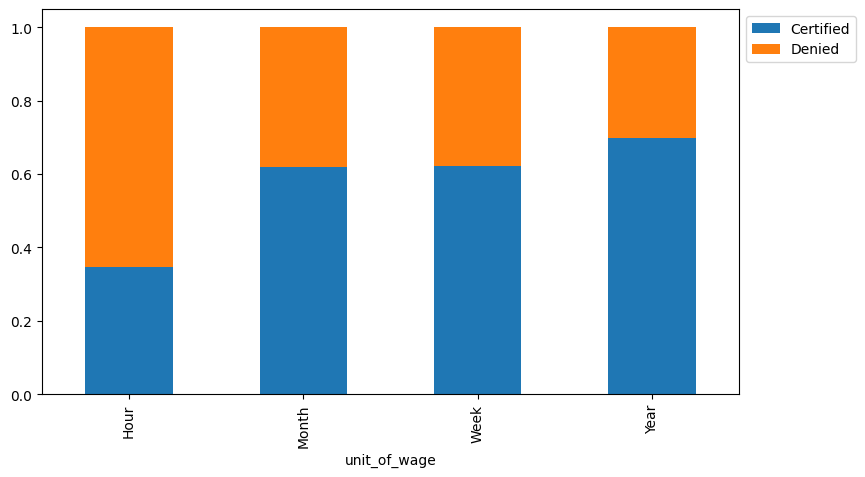

In [52]:
stacked_barplot(visa_data, "unit_of_wage", "case_status")

In [53]:
visa_data['unit_of_wage'].value_counts()

,count
unit_of_wage,
Year,22962
Hour,2157
Week,272
Month,89


Observation

*   The yearly unit wage is the highest and also the most preferred by majority of the employees. 70 percent of employees under yearly unit wage got their visas Certified.
*   Unit wage played a major role in visa approval



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Checking for missing values

In [54]:
# checking for null values
visa_data.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


* There are no null values in the dataset

### Outlier Check

- Let's check for outliers in the dataset

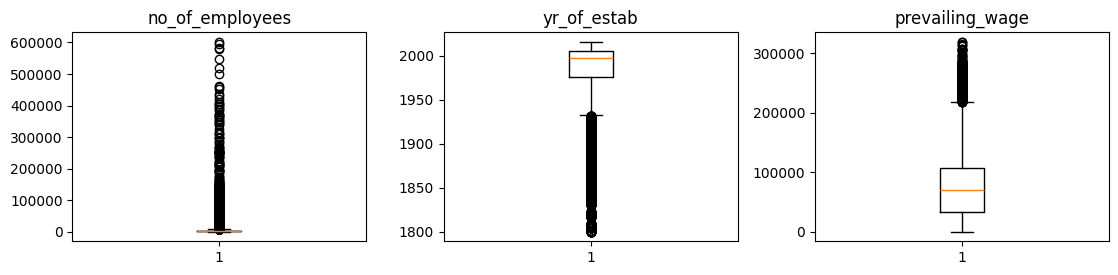

In [55]:
# outlier detection using boxplot
numeric_columns = visa_data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15,15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()



*   There are several outliers in the dataset both in the upper and lower region of the boxplot
*   However, we will not treat them as they are proper values.

### Data Preparation for modeling

*   We want to predict which visa will be certified.
*   Before we proceed to build a model, we'll have to encode categorical features in the dataset
*   We'll split the data into train and test to be able to evaluate the model that we build on the train data.




In [56]:
visa_data["case_status"] = visa_data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [57]:
X = visa_data.drop(['case_status'],axis=1)
y = visa_data['case_status']

X = pd.get_dummies(X,drop_first=True)

In [58]:
# Splitting data into training and test set:

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [59]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used as the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [61]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [62]:
# lets define the decision tree classifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)


In [63]:
#lets fit the decision tree classifier on the train data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

#### Lets check the model performance on the training set

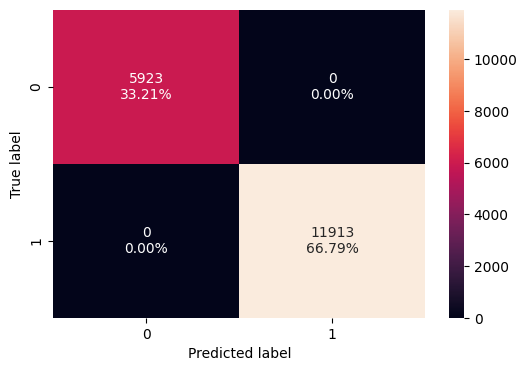

In [64]:
# creating confusion matrix for the train data
confusion_matrix_sklearn(model, X_train, y_train)

**Confusion Matrix -**

* Visa application was Certified and the model predicted it correctly that the visa will be Certified :  True Positive (True label=1,predicted=1)

* Visa was not certified and the model predicted that the visa will be Certified : False Positive (True label=0,predicted=1)

* Visa was not Certified and the model predicted that the visa will not be Certified : True Negative (True label=0,predicted=0)

* Visa was Certified and the model predicted that the visa won't be Certified: False Negative (True label=1,predicted=0)

In [65]:
#Lets check performance of the decision tree classifier on the train data

dtree_model_train_perf=model_performance_classification_sklearn(model, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


### Lets check the decison tree classifier model performance on test set

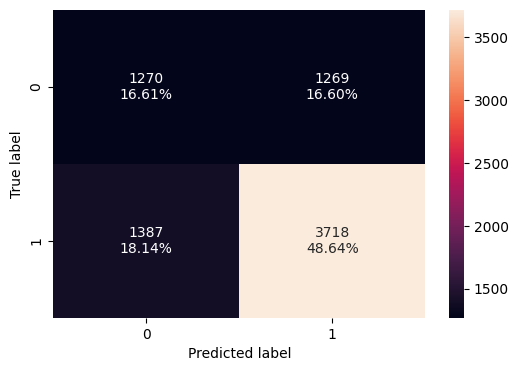

In [66]:
# Lets create confusion matrix for the test data
confusion_matrix_sklearn(model, X_test, y_test)


In [67]:
# Lets check performance of the decision tree classifier on the test data

dtree_model_test_perf=model_performance_classification_sklearn(model, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.652538  0.728306   0.745538  0.736821


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the F1.

* Decision Tree is giving a higher train F1-score but it is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.



### Hyperparameter Tuning - Decision Tree

In [68]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=np.int64(2),
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

### Lets create confusion matrix for train data on tuned estimator

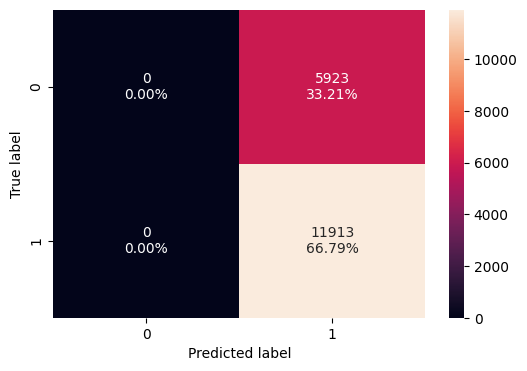

In [69]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

### Lets check the performance for train data on tuned estimator


In [70]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901


### Lets create confusion matrix for test data on tuned estimator

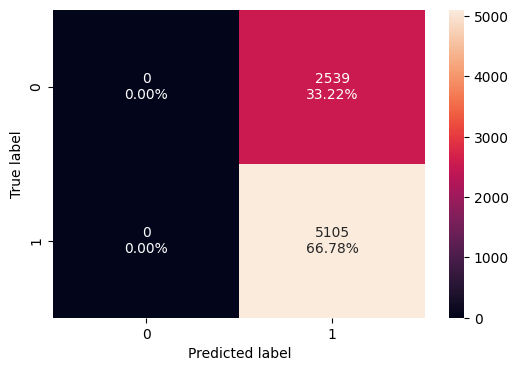

In [71]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

### Lets check performance for test data on tuned estimator

In [72]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


* Overfitting in decision tree has reduced greaty and also F1-score have improved after hyperparameter tuning
* Lets try other classification models and see if we will get a better F1-score

---





## Building bagging and boosting models

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [73]:
# Lets define bagging classifier with random state = 1

bagging = BaggingClassifier(random_state=1)

In [74]:
# Lets fit bagging classifier model on the train data

bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

### Lets Check the Bagging Classifier model performance on the training set

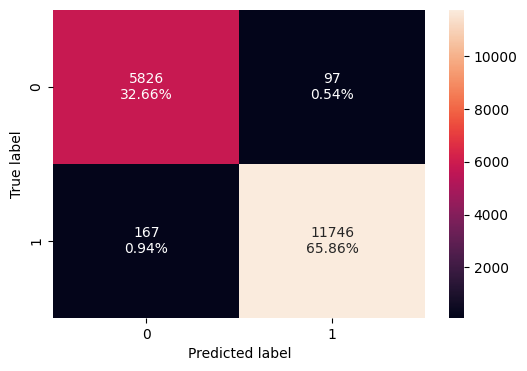

In [75]:
# create confusion matrix for train data

confusion_matrix_sklearn(bagging, X_train, y_train)

### Lets check performance of the model on train data

In [76]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


### Lets check the Bagging Classifier model performance on test set

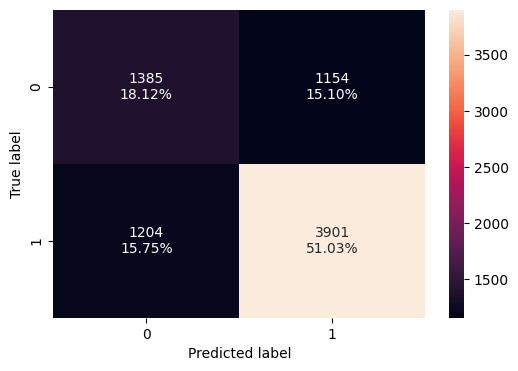

In [77]:
# create confusion matrix for test data

confusion_matrix_sklearn(bagging, X_test, y_test)

### Lets check performance of the model on test data

In [78]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913



*   Using the Bagging classifier model, the F1-score reduced slightly on the training performance but there its still overfitting on the training data
*   Let's try hyperparameter tuning and see if the model performance improves.



### Hyperparameter Tuning - Bagging Classifier

In [79]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=20,
                  random_state=1)

### Lets Check model Tunning performance on training set

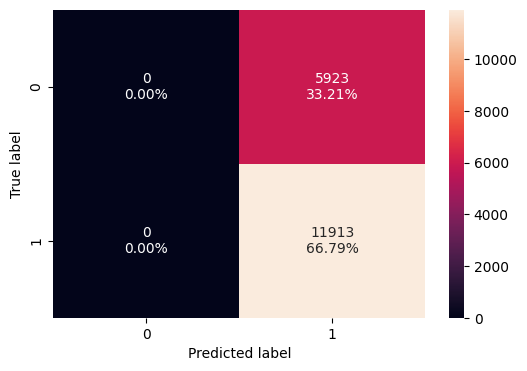

In [80]:
# create confusion matrix for train data on tuned estimator

confusion_matrix_sklearn(bagging_estimator_tuned, X_train,y_train)

### Lets check performance for train data on tuned estimator

In [81]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901


### Lets check model performance on the test set

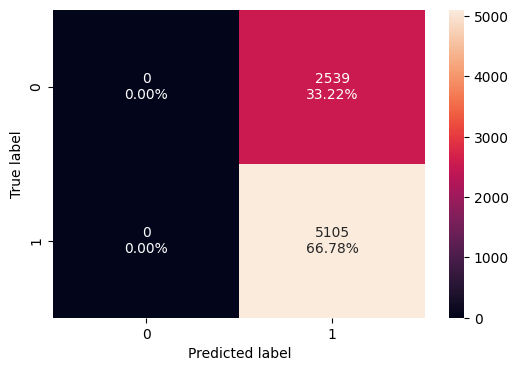

In [82]:
# create confusion matrix for test data on tuned estimator

confusion_matrix_sklearn(bagging_estimator_tuned, X_test,y_test)

#### check performance for test data on tuned estimator

In [83]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


* The overfitting has reduced significantly and the model performance has improved.
* The test F1-score has increased to the same value as train F1-score

### Lets try the Random Forest Classifier Model

In [84]:
# Lets define random forest

rf = RandomForestClassifier(random_state=1)

In [85]:
# fit random forest on the train data

rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

### Lets check model performance on training set

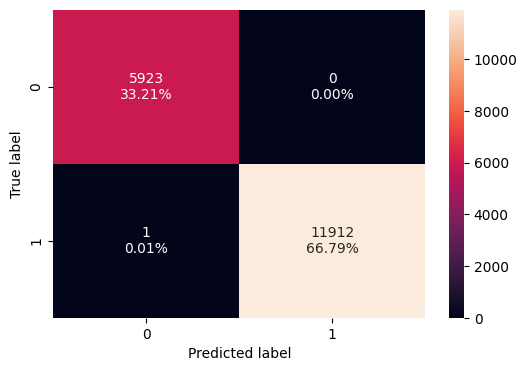

In [86]:
#create confusion matrix for the train data

confusion_matrix_sklearn(rf,X_train,y_train)

In [87]:
# Lets check performance of random forest model on train data

rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


### Lets Check model performance on the test set

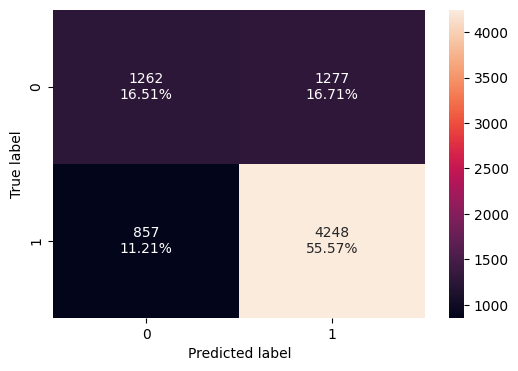

In [88]:
#create confusion matrix for the test data

confusion_matrix_sklearn(rf,X_test,y_test)

In [90]:
# Lets check performance of random forest model on test data

rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247



*   The Random Forest classifier model is overfitting on the training data
*   Let's try hyperparameter tuning and see if the model performance improves.



### Hyperparameter Tuning - Random Forest

In [91]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs= -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(5), min_samples_split=5,
                       n_estimators=np.int64(20), oob_score=True,
                       random_state=1)

### Checking model performance on training set

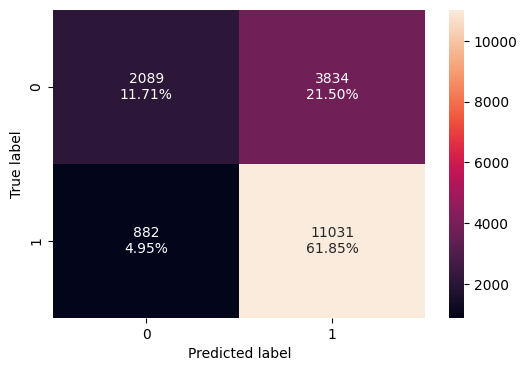

In [92]:
# Lets create confusion matrix for train data on tuned estimator

confusion_matrix_sklearn(rf_tuned, X_train,y_train)

In [93]:
# Lets check performance for train data on tuned estimator

rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.735591  0.925963   0.742079  0.823885


### Checking model performance on testing set

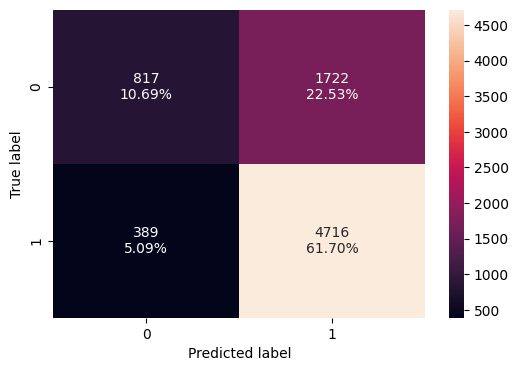

In [94]:
# Lets create confusion matrix for test data on tuned estimator

confusion_matrix_sklearn(rf_tuned, X_test,y_test)

In [95]:
# Lets check performance for test data on tuned estimator

rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)


Testing performance 
    Accuracy  Recall  Precision        F1
0  0.723836  0.9238   0.732526  0.817119


Observation

*   There seems to be an improvement on F1-score using the Hyperparameter Tuning for Random Forex than our previous models



## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [96]:
# Lets define AdaBoost Classifier with random state = 1

abc = AdaBoostClassifier(random_state=1)

In [97]:
# Lets fit AdaBoost Classifier on the train data

abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

### Checking model performance on training set

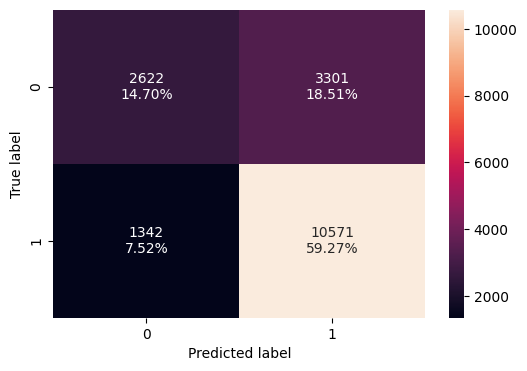

In [98]:
# Lets create confusion matrix for train

confusion_matrix_sklearn(abc, X_train,y_train)

In [99]:
# Lets check performance on train data

ab_classifier_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.739684,0.88735,0.762039,0.819934


### Checking model performance on test set

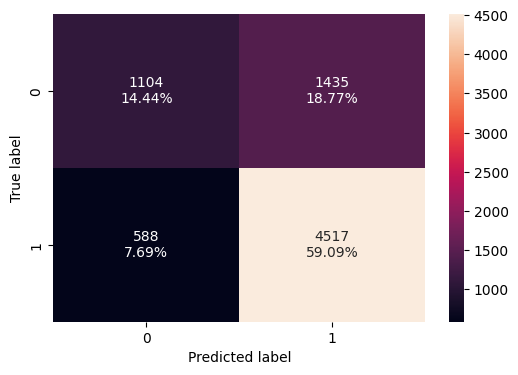

In [100]:
# Lets create confusion matrix for test data

confusion_matrix_sklearn(abc,X_test,y_test)

In [101]:
# Lets check performance on test data

ab_classifier_model_train_perf = model_performance_classification_sklearn(abc, X_test, y_test)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.735348,0.884819,0.758905,0.817039


*   There is no overfitting on the training data using the AdaBoost classifier




### Hyperparameter Tuning - AdaBoost Classifier

In [104]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {

    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1,
                                                    random_state=1),
                   learning_rate=np.float64(0.1), n_estimators=np.int64(80),
                   random_state=1)

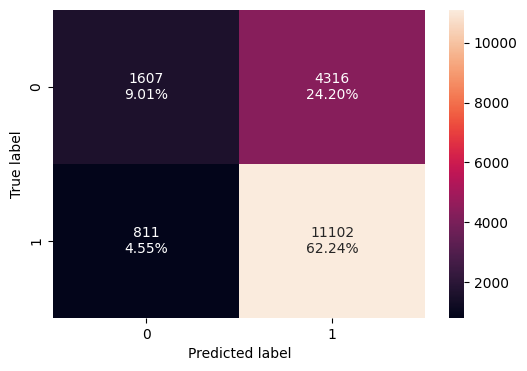

In [105]:
# Lets create confusion matrix for train data on tuned estimator

confusion_matrix_sklearn(abc_tuned, X_train,y_train)

### Lets check the model performance on training set

In [106]:
# Lets check performance for train data on tuned estimator

abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",abc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


### Lets Check the model performance on test set

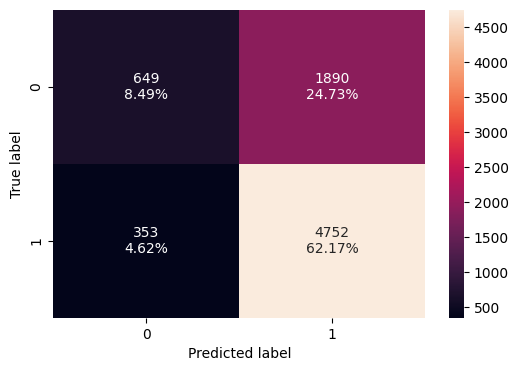

In [108]:
# Lets create confusion matrix for test data on tuned estimator

confusion_matrix_sklearn(abc_tuned, X_test,y_test)

In [109]:
# Lets check performance for test data on tuned estimator

abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Testing performance \n",abc_tuned_model_test_perf)


Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058



*   There is a reduction on the F1-score after hyperparameter tuning of the AdaBoost Model but no overfitting



### Gradient Boosting Classifier

In [111]:
# Lets define GradientBoostingClassifier with random state = 1

gb_classifier = GradientBoostingClassifier(random_state=1)

In [112]:
# Lets fit GradientBoostingClassifier on the train data

gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

### Checking model performance on training set

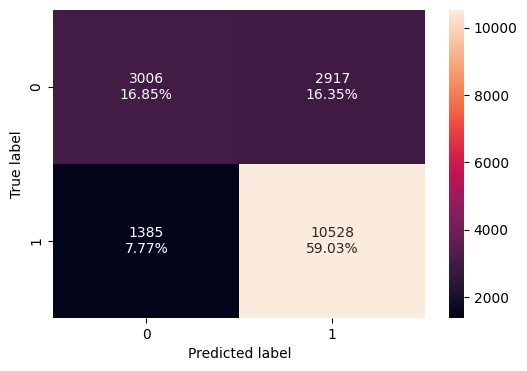

In [113]:
# Lets create confusion matrix for train data

confusion_matrix_sklearn(gb_classifier, X_train,y_train)

In [114]:
# Lets check the performance on train data

gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


### Lets check the model performance on test set

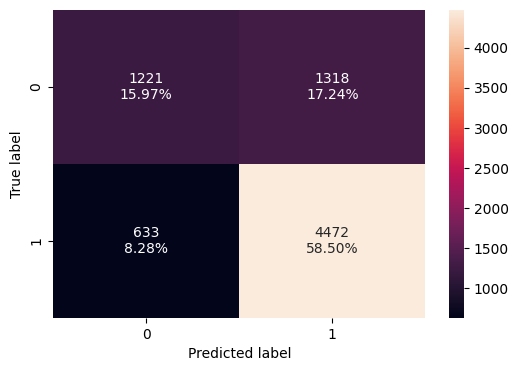

In [115]:
# create confusion matrix for test data

confusion_matrix_sklearn(gb_classifier, X_test,y_test)

In [116]:
# Lets check the performance on test data

gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927



*   There is an improvement on the F1-score as compared to the previous model
*   There is no overfitting on the training model
*   Lets try Hyperparameter tuning and see if we will get an F1-score





### Hyperparameter Tuning - Gradient Boosting Classifier

In [117]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=np.float64(0.1), max_features=0.9,
                           n_estimators=200, random_state=1, subsample=0.9)

### Checking model performance on training set

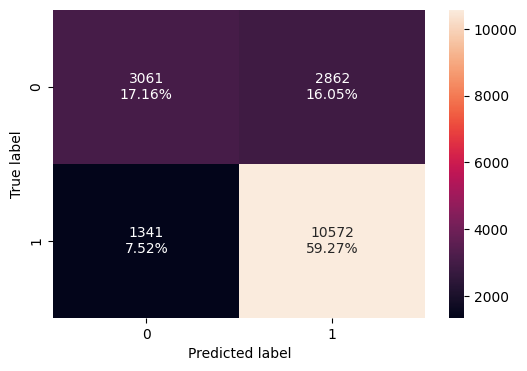

In [118]:
# Lets create confusion matrix for train data on tuned estimator

confusion_matrix_sklearn(gbc_tuned, X_train,y_train)

In [119]:
# Lets check performance for train data on tuned estimator

gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.764353  0.887434   0.786958  0.834182


### Checking model performance on test set

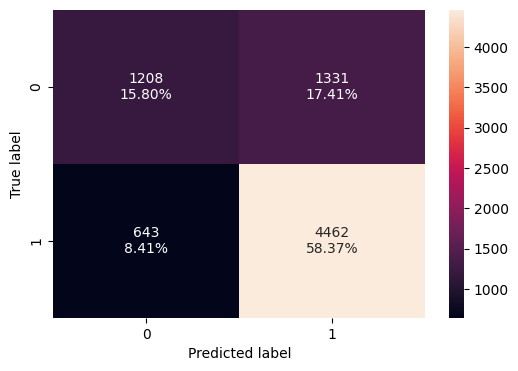

In [120]:
# Lets create confusion matrix for test data on tuned estimator

confusion_matrix_sklearn(gbc_tuned, X_test,y_test)

In [121]:
# Lets check performance for train data on tuned estimator

gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Testing performance \n",gbc_tuned_model_train_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.764353  0.887434   0.786958  0.834182



*   There is a significant improvement on the F1-score compared to other tuned models.
*   There is no overfitting of the training data by the Gradient tuned model



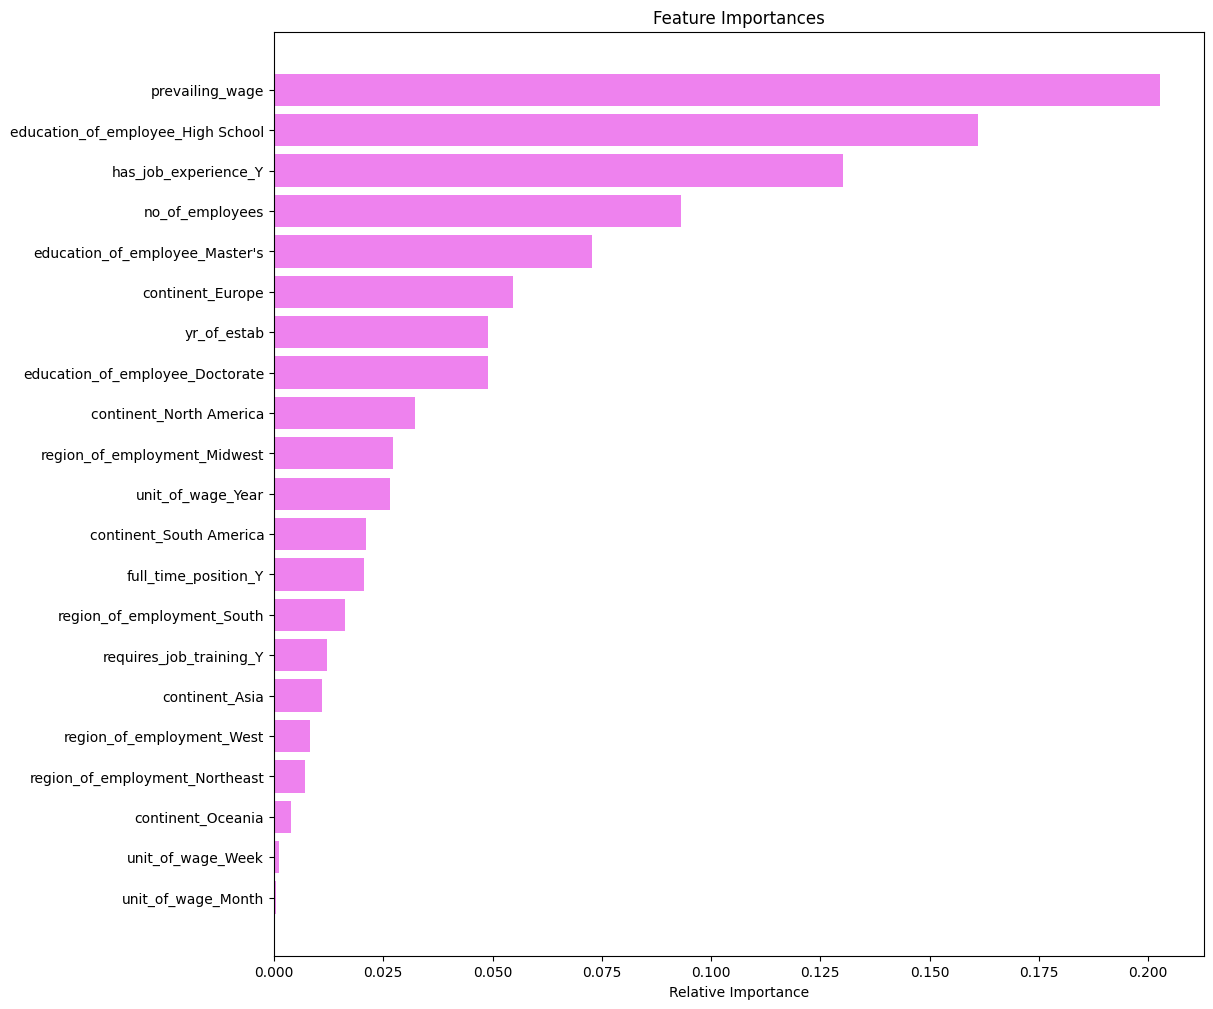

In [122]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



*   Education_of_employee_HighSchool is the most important feature, followed by has_job_experience_Y and prevailing_wage, as per the tuned gradient boosting model



### XGBoost Classifier

In [123]:
# Lets define AdaBoost Classifier with random state = 1

xgb_classifier = XGBClassifier(random_state=1,eval_metric='logloss')

In [124]:
# Lets fit XGBoost Classifier on the train data

xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### Lets check the XGB model performance on training set

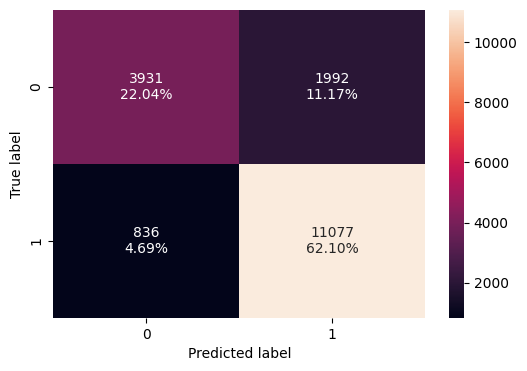

In [125]:
# create confusion matrix for train data

confusion_matrix_sklearn(xgb_classifier, X_train,y_train)

In [126]:
# Check model performance on train data

xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.841444,0.929825,0.847578,0.886798


### Lets check the XGB model performance on test set

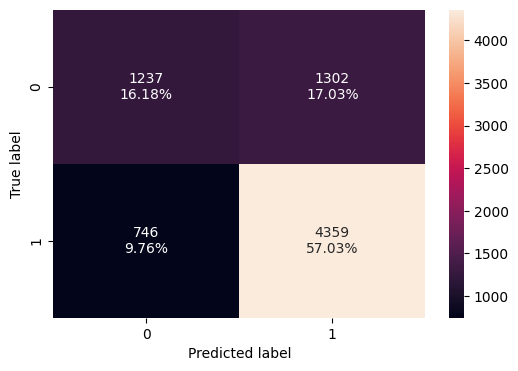

In [127]:
# create confusion matrix for test data

confusion_matrix_sklearn(xgb_classifier, X_test,y_test)

In [128]:
# Check model performance on test data

xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732077,0.853869,0.770005,0.809772



*   There is an increase on F1-score for the training set but its overfitting the training data
*   Lets use xgb Hyperparameter tuning and see if there will be an improvement





### Hyperparameter Tuning - XGBoost Classifier

In [129]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=np.float64(0.1),
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(150), n_jobs=None,
              num_parallel_tree=None, ...)

### Checking model performance on training set

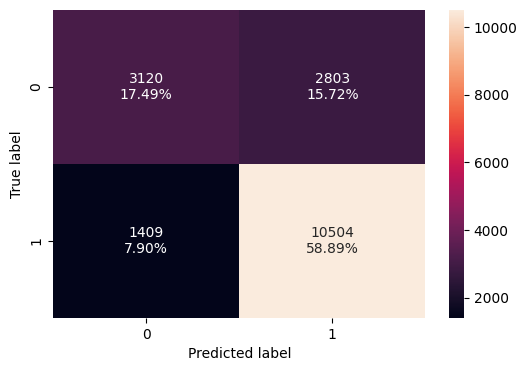

In [130]:
# Lets create confusion matrix for train data on tuned estimator

confusion_matrix_sklearn(xgb_tuned, X_train,y_train)

In [131]:
# Lets check performance for train data on tuned estimator

xgb_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.764353  0.887434   0.786958  0.834182


### Checking model performance on testing set

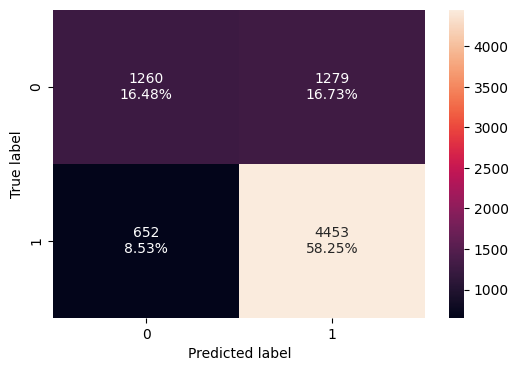

In [132]:
# Lets create confusion matrix for test data on tuned estimator

confusion_matrix_sklearn(xgb_tuned, X_test,y_test)

In [133]:
# Lets check performance for test data on tuned estimator

xgb_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Training performance \n",gbc_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.764353  0.887434   0.786958  0.834182



*   There is a significant improvement on the F1-score after tuning the xgb model
*   There is no overfitting on the training model



In [134]:
# Lets check for the important featues using xgb_tuned model

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.342421
has_job_experience_Y               0.127191
education_of_employee_Master's     0.099940
education_of_employee_Doctorate    0.084686
continent_Europe                   0.059912
unit_of_wage_Year                  0.038965
region_of_employment_Midwest       0.032565
region_of_employment_South         0.027729
prevailing_wage                    0.024403
region_of_employment_Northeast     0.023712
continent_Asia                     0.021650
full_time_position_Y               0.020466
region_of_employment_West          0.018184
continent_North America            0.013366
requires_job_training_Y            0.013359
continent_South America            0.013259
yr_of_estab                        0.008696
no_of_employees                    0.007636
continent_Oceania                  0.007415
unit_of_wage_Week                  0.007230
unit_of_wage_Month                 0.007215


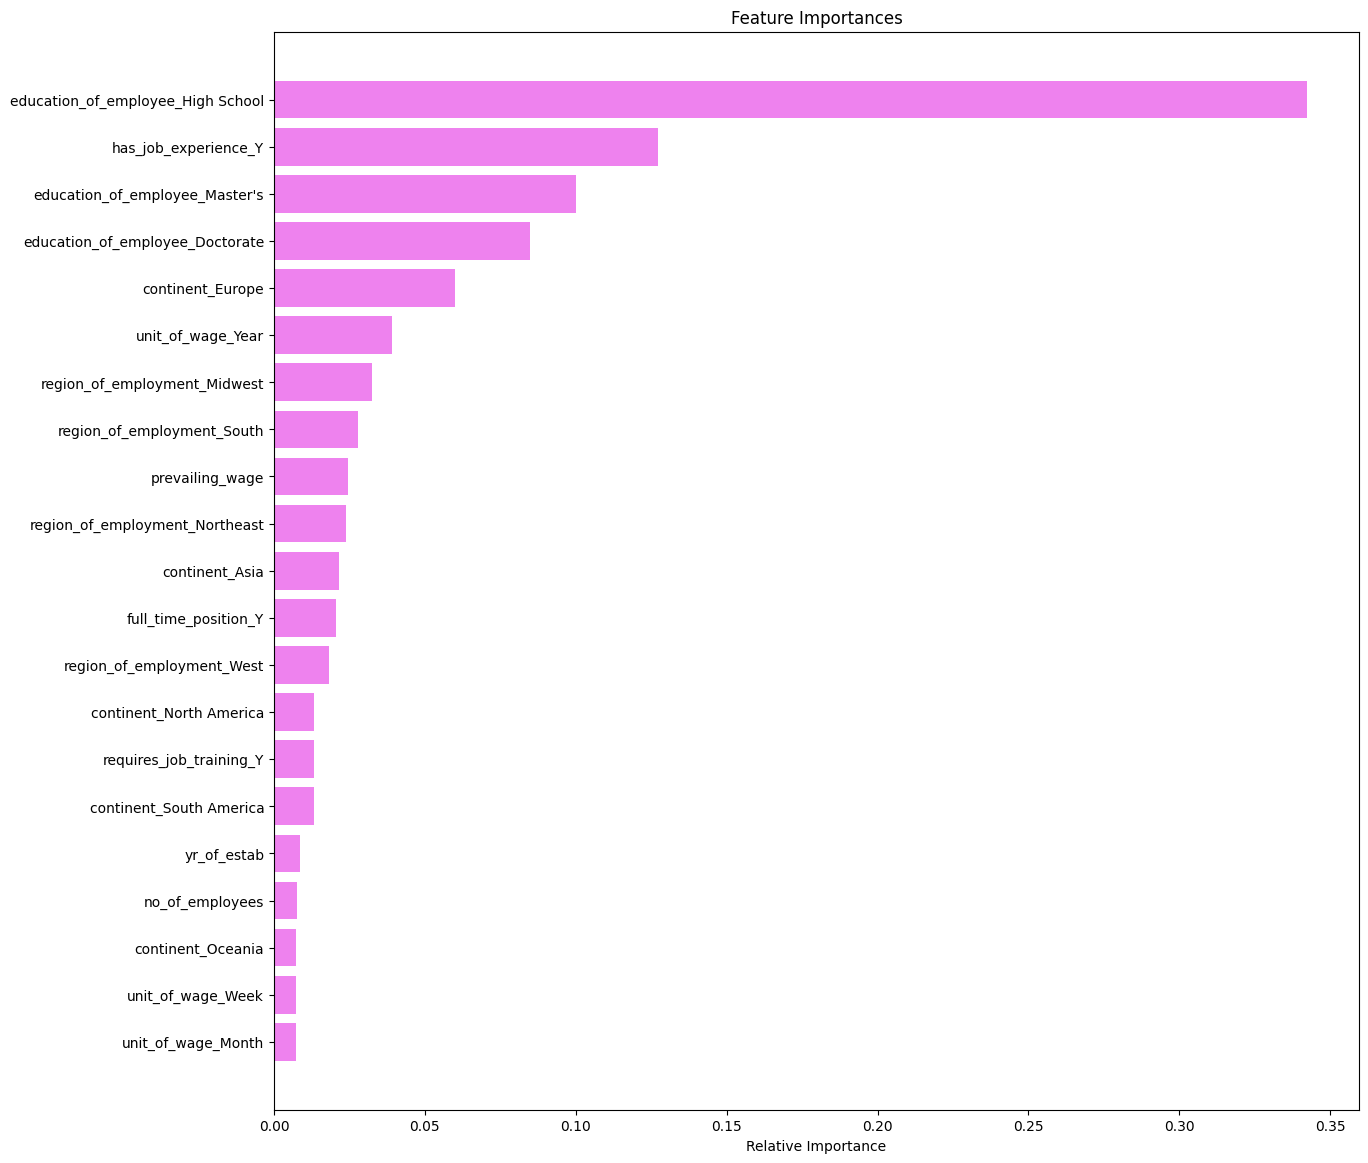

In [135]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(14,14))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

*   Education_of_employee_HighSchool is the most important feature needed by the model to predict which applicants visa will be validated, followed by has_job_experience_Y, educatin_of_employee_Doctorate, unit_wage_year and education_of_employee_Masters.

## Stacking Classifier Model

### Let's build a stacking model with the tuned models - Decision Tree, AdaBoost, gradient boosting, Random forest, and , then use XGBoost to get the final prediction.

In [136]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator),("AdaBoost", abc_tuned)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=np.int64(5),
                                                       min_samples_split=5,
                                                       n_estimators=np.int64(20),
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=np.float64(0.1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.9)...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=np.float64(0.1),
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=np.int64(150),
                                                 n_jobs=None,
                                                 num_parallel_tree=None, ...))

### Lets Check the model performance on training set and testing set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.760653  0.884328   0.784672  0.831525
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746075  0.874241   0.774557  0.821386


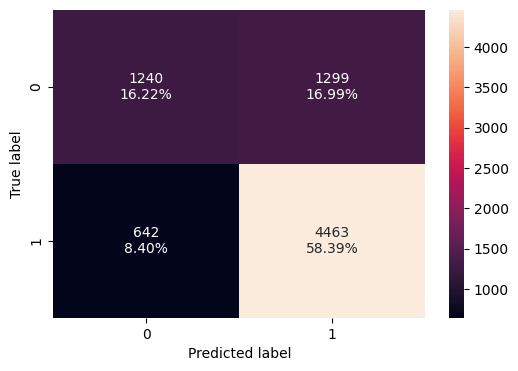

In [137]:
#Calculating different metrics

stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix

confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* The stacking classifier is giving a similar performance as compared to XGBoost with slightly more overfitting.
* The confusion matrix shows that the model can identify majority of applicants whose visas are likely to be Certified.



*   So far, Hyperparameter tuning has greatly improved the performence of the Models.



## Model Performance Comparison and Conclusions

In [138]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.667919,0.985198,0.667919,0.999944,0.735591,0.735348,0.712548,0.758802,0.764353,0.841444,0.764353,0.760653
Recall,1.0,1.000000,0.985982,1.000000,0.999916,0.925963,0.884819,0.931923,0.883740,0.887434,0.929825,0.887434,0.884328
Precision,1.0,0.667919,0.991810,0.667919,1.000000,0.742079,0.758905,0.720067,0.783042,0.786958,0.847578,0.786958,0.784672
F1,1.0,0.800901,0.988887,0.800901,0.999958,0.823885,0.817039,0.812411,0.830349,0.834182,0.886798,0.834182,0.831525


In [139]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_model_test_perf.T,bagging_estimator_model_test_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.652538,0.667844,0.720827,0.723836,0.691523,0.667844,0.735348,0.706567,0.744767,0.741758,0.732077,0.741758,0.746075
Recall,0.728306,1.000000,0.832125,0.923800,0.764153,1.000000,0.884819,0.930852,0.876004,0.874045,0.853869,0.874045,0.874241
Precision,0.745538,0.667844,0.768869,0.732526,0.771711,0.667844,0.758905,0.715447,0.772366,0.770240,0.770005,0.770240,0.774557
F1,0.736821,0.800847,0.799247,0.817119,0.767913,0.800847,0.817039,0.809058,0.820927,0.818866,0.809772,0.818866,0.821386


* The majority of the models are overfitting the training data in terms of F1-score.
* Gradient Boost Classifier is giving the highest F1-score on the test data with no overfitting on the training data.
* Stacking Classifier has given the second-highest test F1-score with no overfitting on the training data.

### Important features of the final model

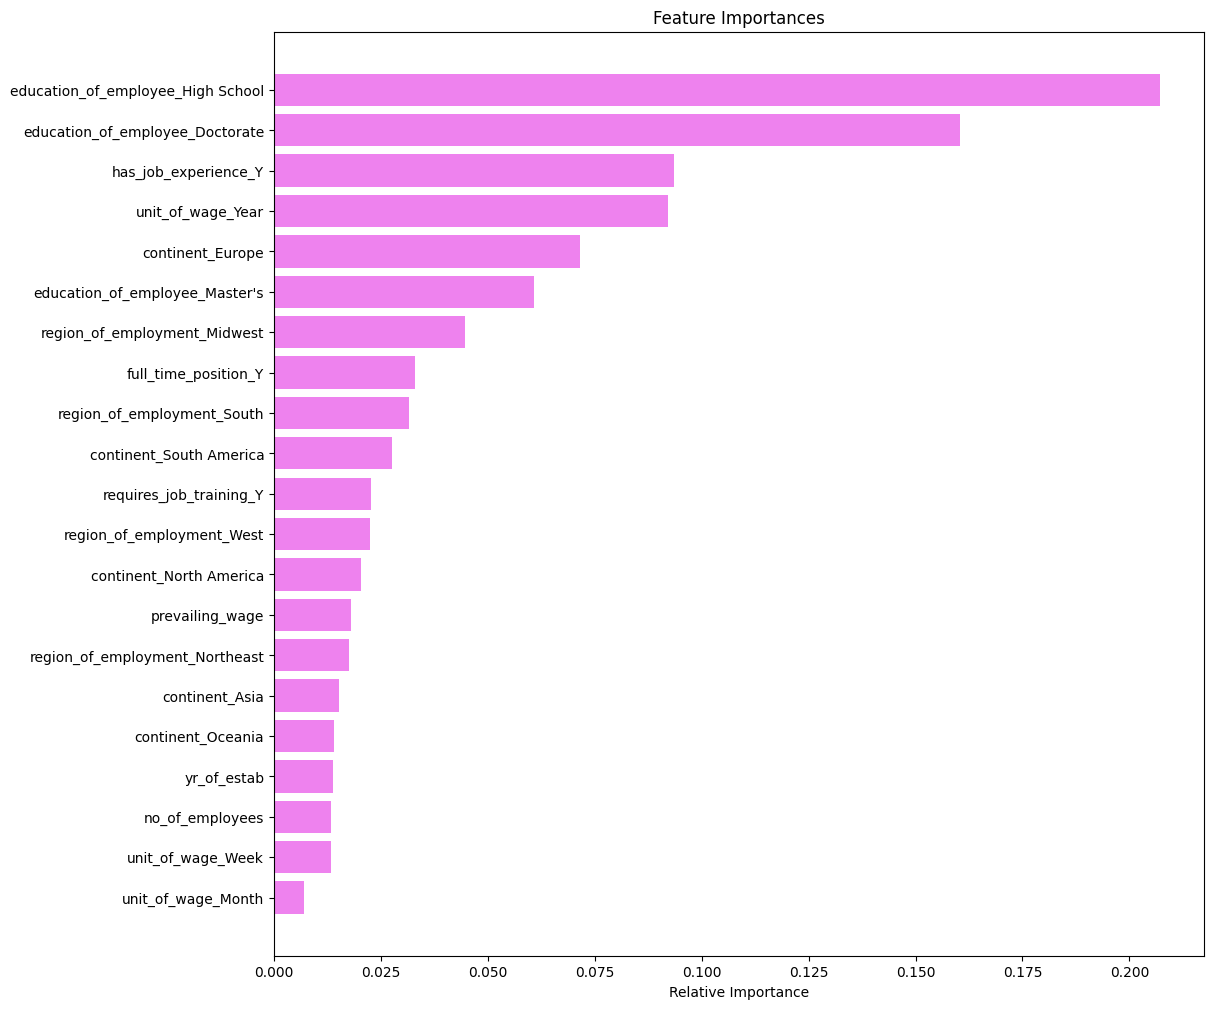

In [140]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education_of_employee_HighSchool is the most important feature in identifying which employees visa will be certified or denied followed by Education_of_employee_Doctorate and has_job_experience_Y

## Actionable Insights and Recommendations

- Based on our analysis, we can give the following recommendations as a determinant factor for candidates visa certification or denial.

    - Candidates who posses higher educational degrees such as Doctorate, Masters and Bachelor's degree should be given higher priority and visa certification.
    - Candidates with no previous job experience should be denied in order to avoid hiring incompetent employees.
    - Candidates who intend to work in the Island region should be considered for visa certification and increased prevailing minimum wage in order to attract more candidates to the region.
    - The highest number of candidates with previous work experience have an intention of working in the Northeast region of the country, therefore, there is need to increase the percentage of visa certification in this region in order to inorder to bring in well qualified and experience employees which will help improve the economy
    - Most of the candidates who preffered yearly prevailing minimum wage got their visas certified.
    - Candidates with lower educational qualifications like High School education sould be given less priority for visa certification since they have little or no professional knowledge about the job.

- Our tuned Models have collectively learned more than 80% of the training data along side with the noise but Gradient Boosting Classifier Model has the highest F1-score value of about 83% without overfitting on the training data.This has helped to reduce the impact of False Positives and False Negatives on candidates visa application and at such, can be used to make further predictions regarding candidates visa status.
